<a href="https://colab.research.google.com/github/KonradGonrad/PyTorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [3]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [4]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code


2.4.0+cu121


## 1. What are 3 areas in industry where computer vision is currently being used?

In [5]:
"""
1. Electric vehicles and their auto-pilot system
2. Apps and websites, where we do a photo of something and then we're getting an input - eg. Google search by image feature
3. Security industry and some item/person tracking on camera
"""

"\n1. Electric vehicles and their auto-pilot system\n2. Apps and websites, where we do a photo of something and then we're getting an input - eg. Google search by image feature\n3. Security industry and some item/person tracking on camera\n"

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [6]:
"""
In a nutshell, overfitting is something like the moment when our model is overfitted to the training data and predicts this data too closely or exactly as it should, which causes the model to not cope well with any data other than training; the model learned the training pattern, not the patterns in the data
"""

'\nIn a nutshell, overfitting is something like the moment when our model is overfitted to the training data and predicts this data too closely or exactly as it should, which causes the model to not cope well with any data other than training; the model learned the training pattern, not the patterns in the data\n'

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [7]:
"""
1. Splitting data - split data into training and testing set, where training set is more likely something around 80% of the data; there is needed large dataset
2. Data augmentation - if we have not so much data we can do some augmentation; some operations on data, like for e.g. with photos - rotating, scaling, flipping, shifting
3. Early stop - We can do a trigger which stops training when our model lose instead of decreasing starts increasing. There we can use some plots to visualize loss decrease
"""

'\n1. Splitting data - split data into training and testing set, where training set is more likely something around 80% of the data; there is needed large dataset\n2. Data augmentation - if we have not so much data we can do some augmentation; some operations on data, like for e.g. with photos - rotating, scaling, flipping, shifting\n3. Early stop - We can do a trigger which stops training when our model lose instead of decreasing starts increasing. There we can use some plots to visualize loss decrease\n'

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [50]:
import torch
from torchvision import datasets
from pathlib import Path
from torchvision.transforms import ToTensor

DATA_PATH = Path("data")
train_data = datasets.FashionMNIST(root=DATA_PATH,
                                   train=True,
                                   download=True,
                                   transform = ToTensor(),
                                   target_transform=None)

test_data = datasets.FashionMNIST(root=DATA_PATH,
                                  train=False,
                                  download=True,
                                  transform= ToTensor(),
                                  target_transform=None,
                                  )

## 6. Visualize at least 5 different samples of the MNIST training dataset.

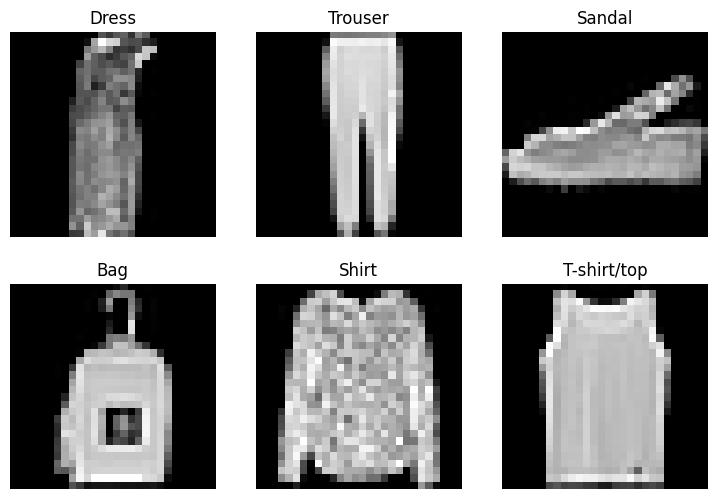

In [9]:
import matplotlib.pyplot as plt
import random

target_classes = train_data.classes

cols = 3
rows = 2
figure = plt.figure(figsize=(9, 6))
for i in range(1, cols * rows +1):
  random_idx = random.randint(0, len(train_data))
  img, label = train_data[random_idx]
  figure.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(target_classes[label])
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [51]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [36]:
from torch import nn

class FashionMnistTinyVGG(nn.Module):
  def __init__(self,
               input_units: int,
               hidden_units: int,
               output_units: int
               ) -> None:
    super().__init__()
    self.layer_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.layer_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                        stride=1,
                        padding=0)
    )
    self.output_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*8*8,
                  out_features=output_units)
    )
  def forward(self, x):
    x = self.layer_1(x)
    #print(x.shape)
    x = self.layer_2(x)
    #print(x.shape)
    x = self.output_layer(x)
    #print(x.shape)
    return x

model_1_cpu = FashionMnistTinyVGG(input_units=1,
                              hidden_units=10,
                              output_units=len(target_classes))

if torch.cuda.is_available():
  model_1_gpu = FashionMnistTinyVGG(input_units=1,
                                hidden_units=10,
                                output_units=len(target_classes)).to('cuda')

In [37]:
dummy_x, dummy_y = train_data[0]
dummy_logits = model_1_cpu(dummy_x.unsqueeze(0))
dummy_pred_probs = torch.softmax(dummy_logits, dim=1)
dummy_pred_probs
dummy_pred = dummy_pred_probs.argmax(dim=1)
target_classes[dummy_pred]

'Pullover'

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [38]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print("helper_functions.py is already installed")
else:
  print("Downloading helper_functions.py")
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)
  print('Downloading finished')

helper_functions.py is already installed


In [39]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
acc_fn = accuracy_fn
optimizer = torch.optim.SGD(params=model_1_cpu.parameters(),
                            lr=0.1)

def train_step(model: nn.Module,
               data: DataLoader,
               loss_fn: torch.nn,
               acc_fn: any,
               optimizer: torch.optim,
               device = torch.device
               ):
  train_loss, train_acc = 0, 0

  model.train()
  for batch, (X, y) in enumerate(data):
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_logits = model(X)
    # Calculate the loss
    loss = loss_fn(y_logits, y)
    train_loss += loss

    acc = acc_fn(y, y_logits.argmax(dim=1))
    train_acc += acc
    # optimizer zero grad
    optimizer.zero_grad()
    # Loss backward
    loss.backward()
    # Optimzier step
    optimizer.step()
  train_loss /= len(data)
  train_acc /= len(data)

  print(f"train loss: {train_loss:.2f} | Train acc: {train_acc:.2f}")




In [40]:
from tqdm.auto import tqdm
from timeit import default_timer as timer


epochs = 5

cpu_start = timer()
for epoch in tqdm(range(epochs)):
  train_step(model=model_1_cpu,
             data=train_dataloader,
             loss_fn=loss_fn,
             acc_fn=accuracy_fn,
             optimizer=optimizer,
             device='cpu'
             )
cpu_end = timer()
total_time_cpu = cpu_end - cpu_start
print(f"Cpu training time: {total_time_cpu:.2f}")

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.65 | Train acc: 76.11
train loss: 0.41 | Train acc: 85.16
train loss: 0.37 | Train acc: 86.61
train loss: 0.35 | Train acc: 87.35
train loss: 0.34 | Train acc: 87.82
Cpu training time: 229.96


In [41]:
epochs = 5
if torch.cuda.is_available():
  gpu_start = timer()
  for epoch in tqdm(range(epochs)):
    train_step(model=model_1_gpu,
              data=train_dataloader,
              loss_fn=loss_fn,
              acc_fn=accuracy_fn,
              optimizer=optimzier,
              device='cuda')
  gpu_end = timer()
  total_time_gpu = gpu_end - gpu_start
  print(f"Gpu training time: {total_time_gpu:.2f}")

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

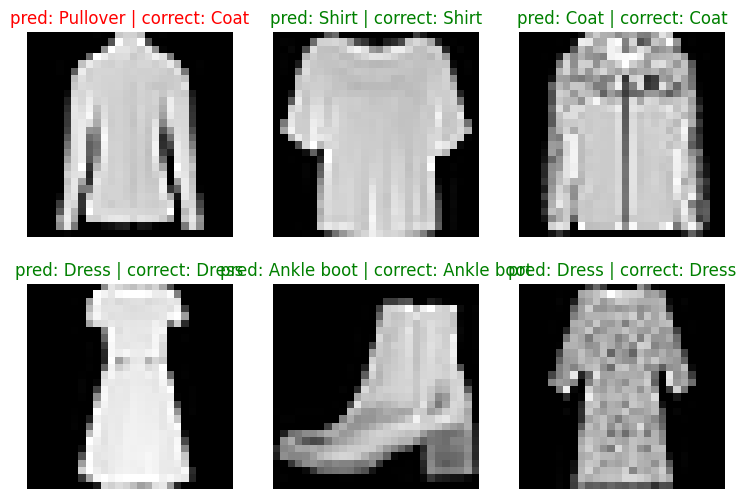

In [44]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(9, 6))
rows = 2
cols = 3
for i in range(1, rows*cols + 1):
  random_idx = random.randint(0, len(train_data))
  X, y = train_data[random_idx]
  y_logits = model_1_cpu(X.unsqueeze(0))
  y_pred_probabilities = torch.softmax(y_logits.squeeze(), dim=0)
  y_pred = y_pred_probabilities.argmax(dim=0)
  figure.add_subplot(rows, cols, i)
  plt.imshow(X.squeeze(), cmap='gray')
  if y_pred == y:
    plt.title(label = f"pred: {target_classes[y_pred]} | correct: {target_classes[y]}", c="g")
  else:
    plt.title(label = f"pred: {target_classes[y_pred]} | correct: {target_classes[y]}", c='r')
  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [62]:
y_preds = []
model_1_cpu.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc='Preds'):
    y_logit = model_1_cpu(X)
    y_pred_prob = torch.softmax(y_logit, dim=1)
    y_pred = y_pred_prob.argmax(dim=1)
    y_preds.append(y_pred)
y_preds = torch.cat(y_preds)
y_preds.shape

Preds:   0%|          | 0/313 [00:00<?, ?it/s]

torch.Size([10000])

In [66]:
!pip install torchmetrics

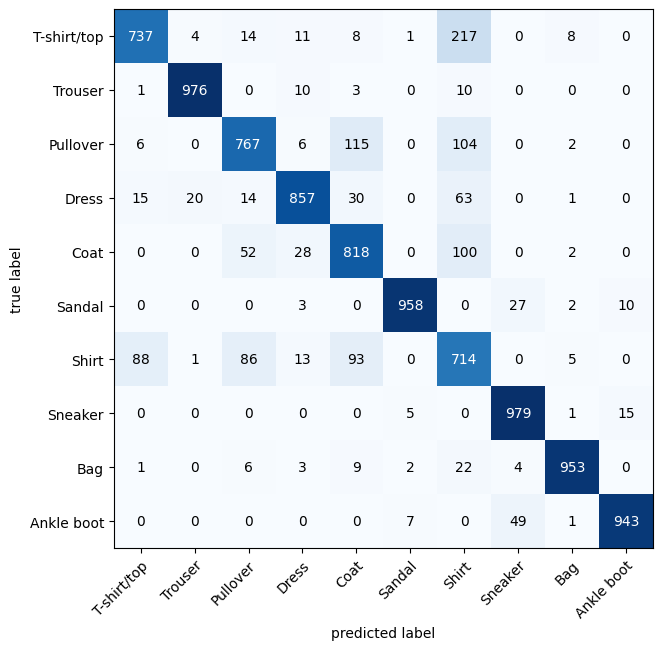

In [67]:
from mlxtend.plotting import plot_confusion_matrix
from torchmetrics import ConfusionMatrix

confmat = ConfusionMatrix(num_classes=len(target_classes), task = 'multiclass')
confmat_tensor = confmat(preds=y_preds,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names=target_classes,
                                figsize=(10,7))

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [88]:
random_tensor = torch.randn(size=(1,3,64,64))

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=1,
                       kernel_size=5,
                       stride=2,
                       padding=0)

output = conv_layer(random_tensor)
output.shape

torch.Size([1, 1, 30, 30])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [97]:
false_preds = []

model_1_cpu.eval()
with torch.inference_mode():
  for X, y in test_data:
    y_logit = model_1_cpu(X.unsqueeze(0))
    y_pred_prob = torch.softmax(y_logit, dim=1)
    y_pred = y_pred_prob.argmax(dim=1)
    if y_pred != y:
      false_preds.append((X, y, y_pred))

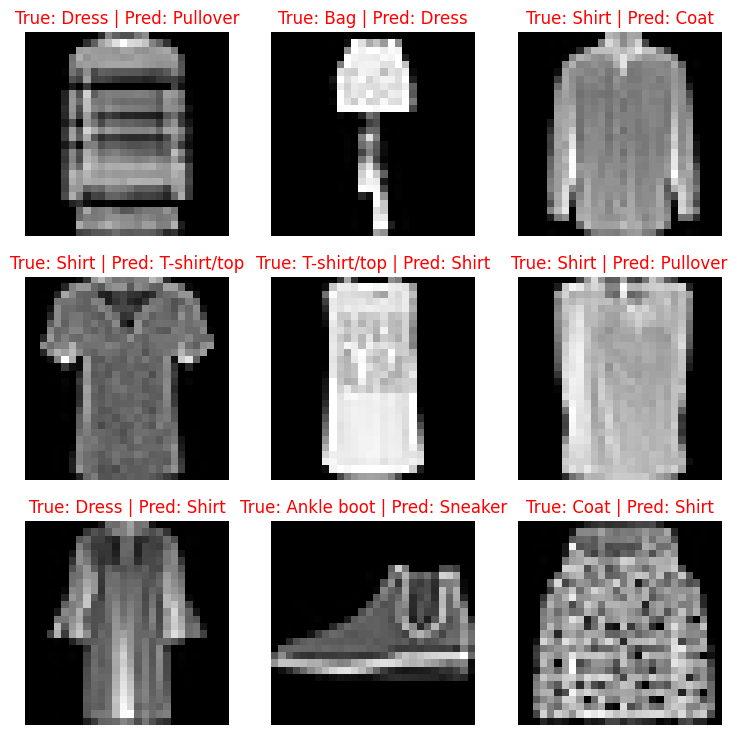

In [101]:
figure = plt.figure(figsize=(9,9))
cols = 3
rows = 3
for i in range(1, cols*rows + 1):
  random_idx = random.randint(0, len(false_preds))
  figure.add_subplot(rows, cols, i)
  plt.imshow(false_preds[random_idx][0].squeeze(), cmap='gray')
  plt.title(f"True: {target_classes[false_preds[random_idx][1]]} | Pred: {target_classes[false_preds[random_idx][2]]}", c='r')
  plt.axis(False)